In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.shape

(1338, 7)

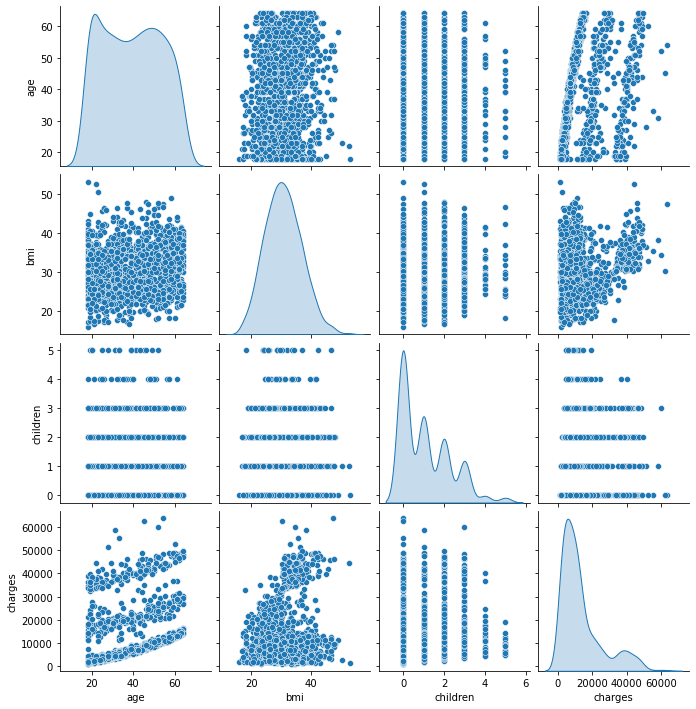

In [10]:
sns.pairplot(df, diag_kind = 'kde')

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df2 = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True).copy()

In [13]:
df2.shape

(1338, 9)

In [14]:
df2.sample(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
93,35,34.770,2,5729.00530,1,0,1,0,0
291,29,29.640,1,20277.80751,1,0,0,0,0
678,56,36.100,3,12363.54700,1,0,0,0,1
1209,59,37.100,1,12347.17200,1,0,0,0,1
1132,57,40.280,0,20709.02034,1,0,0,0,0
452,24,23.400,0,1969.61400,1,0,0,0,1
1307,32,28.120,4,21472.47880,1,1,1,0,0
1317,18,53.130,0,1163.46270,1,0,0,1,0
426,38,27.265,1,6555.07035,0,0,0,0,0
64,20,22.420,0,14711.74380,0,1,1,0,0


In [15]:
df2.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [16]:
X = df2.drop(['charges'], axis = 1)
y = df2[['charges']]

In [17]:
df2.shape

(1338, 9)

In [18]:
xtr, xts, ytr, yts = train_test_split(X, y, test_size = 0.30, random_state=1)

In [19]:
rm = LinearRegression()
rm.fit(xtr, ytr)

LinearRegression()

In [20]:
df2.shape

(1338, 9)

In [21]:
for bob, col in enumerate(xtr.columns):
    print("The coefficient for {} is {}".format(col, rm.coef_[0][bob]))

The coefficient for age is 251.68186514630216
The coefficient for bmi is 322.3891068370292
The coefficient for children is 344.9642552960666
The coefficient for sex_male is -282.7963466088022
The coefficient for smoker_yes is 24059.390476923392
The coefficient for region_northwest is -304.0900976542815
The coefficient for region_southeast is -939.3420969057205
The coefficient for region_southwest is -868.1885586576739


In [22]:
rm.score(xtr, ytr)

0.7545557492633161

In [23]:
rm.score(xts, yts)

0.7405989316927212

In [24]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
xtr2 = poly.fit_transform(xtr)
xts2 = poly.fit_transform(xts)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(xtr2, ytr)

y_pred = poly_clf.predict(xtr2)
print(poly_clf.score(xtr2, ytr))

0.8431274021502367


In [25]:
print(poly_clf.score(xts2, yts))

0.8385891831840521


In [26]:
print(xtr.shape)
print(xtr2.shape)

(936, 8)
(936, 37)


In [27]:
df2.shape

(1338, 9)

In [28]:
df['charges'].corr(df['age'])  #calculate correlation between two variables

0.2990081933306477

In [30]:
df[[‘age’,’charges’]].corr()

SyntaxError: invalid character in identifier (<ipython-input-30-d0cb468b9aa7>, line 1)

In [31]:
df.corr(method = 'pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

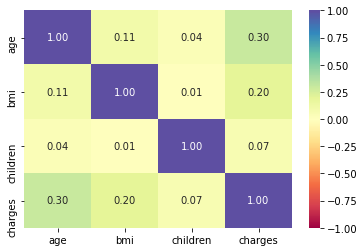

In [32]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

In [33]:
from sklearn.metrics import mean_squared_error

In [39]:
y_pred = rm.predict(xts) #lr is the linear regression model here.

In [40]:
mean_absolute_error(yts, y_pred)

4139.932064766009